
# Bayes' theorem
In probability theory and statistics, Bayes's theorem, named after Reverend Thomas Bayes, describes if A and B denote two events, P(A|B) denotes the conditional probability of A occurring, given that B occurs<br/>
P(A|B)P(B) = P(B|A)P(A) <br/>
A, B	=	events<br/>
P(A|B)	=	probability of A given B is true<br/>
P(B|A)	=	probability of B given A is true<br/>
P(A), P(B)	=	the independent probabilities of A and <br/>

# Naive Bayes

A naive Bayes classifier is an algorithm that uses Bayes' theorem to classify objects. 

In [1]:
pwd

'C:\\Users\\User\\Git-Hup Files\\Machine Learning Classification'

In [2]:
cd C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing

C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing


In [3]:
#Import all the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import Data set from the local directory

df = pd.read_csv("EmailClassification.csv")

In [5]:
df.head(10)

,Email_ID,Month,Email_Sent,Open_Rate,Click_Rate,Conversion_Rate
0,EMA00081000168000,Jan,873,42,14,0
1,EMA00081000187610,Feb,630,32,26,1
2,EMA00081000244770,Mar,988,21,8,0
3,EMA00081000245260,Apr,339,25,9,0
4,EMA00081000264690,May,1157,30,31,1
5,EMA00081000337110,Jun,1157,25,31,1
6,EMA00081000390580,Jul,962,78,27,0
7,EMA00081000445960,Jan,578,17,11,0
8,EMA00081000581770,Feb,1173,33,21,1
9,EMA00081000587870,Mar,1173,23,2,0


In [6]:
#defining X and Y
x = df.iloc[:,2:-1]
y= df.iloc[:, -1]

In [7]:
x.head(10)

,Email_Sent,Open_Rate,Click_Rate
0,873,42,14
1,630,32,26
2,988,21,8
3,339,25,9
4,1157,30,31
5,1157,25,31
6,962,78,27
7,578,17,11
8,1173,33,21
9,1173,23,2


In [8]:
# Splitting data into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x , y, test_size=0.2, random_state=0)

In [9]:
#Training the model using Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
#PREDICT NEW RESULT
#Sample 1
#Here 339 is Email Sent | 25 is OpenRate and 9 is click Rate
print(classifier.predict([[339,25,9]]))

[0]


In [11]:
# Predicting Real Test Set
y_pred = classifier.predict(x_test)

In [12]:
#Confusion Matrix
# No of correct and incorrt prdection
from sklearn.metrics import confusion_matrix, accuracy_score

[[30  0]
 [ 6  4]]


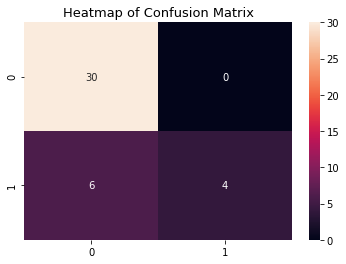

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title('Heatmap of Confusion Matrix', fontsize=13)
sns.heatmap(cm, annot=True)
plt.show()


In [14]:
#.85 % is the corrt prediction
accuracy_score(y_test, y_pred) 

0.85

In [15]:
#Classification Report
#Prediction and Evaluation
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        30
           1       1.00      0.40      0.57        10

    accuracy                           0.85        40
   macro avg       0.92      0.70      0.74        40
weighted avg       0.88      0.85      0.82        40



In [17]:
#Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("accuracies: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

accuracies: 78.62 %
Standard Deviation: 5.69 %
